GST B2C_Sales Data EDA.

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

Step 1: Understand the Problem and Data

Goal: Define objectives and understand the variables.


Data Collection & Loading

Goal: Load and combine all 100 CSV files into one master DataFrame.

In [ ]:
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/Capstone Preprocessing/B2C/b2c_sales_cleaned'

# Use glob to find all files ending with .csv in the specified directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Check if any files were found
if not all_files:
    print(f"Error: No CSV files found in the directory: {path}")
    print("Please check if the path is correct.")
else:
    print(f"Found {len(all_files)} files to merge.")

    # Create a list to hold the dataframes
    df_list = [pd.read_csv(file) for file in all_files]

    # Concatenate all dataframes in the list into a single one
    # ignore_index=True resets the index of the combined dataframe
    df = pd.concat(df_list, ignore_index=True)

    print("\nSuccessfully loaded and combined all files.")
    print("Shape of the combined DataFrame (rows, columns):", df.shape)
    print("\nFirst 5 rows of the combined data:")
    print(df.head())

Found 100 files to merge.

Successfully loaded and combined all files.
Shape of the combined DataFrame (rows, columns): (3029164, 7)

First 5 rows of the combined data:
  Type Place Of Supply  Rate  Applicable Rate (%)  Taxable Value  Cess Amount  \
0   EC    29-Karnataka  18.0                 18.0        3657.69            0   
1   EC       03-Punjab  18.0                 18.0        4971.98            0   
2   OE    29-Karnataka  18.0                 18.0       28225.56            0   
3   EC    29-Karnataka  18.0                 18.0        2464.27            0   
4   OE    29-Karnataka  12.0                 12.0        2853.00            0   

  E-Commerce GSTIN  
0  fW27382mRibF7Zk  
1  Fw30812qwOhZ4ZI  
2              nil  
3  PO08336ODzya9ZZ  
4              nil  


Data Cleaning

Goal: Verify data quality. We will check for missing values and ensure correct data types.

In [ ]:
# 1. Inspect Column Names and Data Types
print("\n--- Step 3: Data Cleaning ---")
print("\nColumn names and data types:")
df.info()

# 2. Handle Missing Values
print("\nMissing values per column (%):")
print(round(df.isnull().sum() / len(df) * 100, 2))

# Strategy:
# - For 'E-Commerce GSTIN', if it has many missing values, it might be expected. We'll leave it.
# - For numerical columns like 'Taxable Value' or 'Cess Amount', we will fill missing values with 0.
df['Taxable Value'].fillna(0, inplace=True)
df['Cess Amount'].fillna(0, inplace=True)

# 3. Standardize Column Names (Good Practice)
# This removes leading/trailing spaces and special characters, making columns easier to call.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('_(%)', '_percent', regex=False)
print("\nStandardized column names:")
print(df.columns)

# 4. Check if 'rate' and 'applicable_rate_percent' are the same
# If they are identical, we can drop one to reduce redundancy.
if 'rate' in df.columns and 'applicable_rate_percent' in df.columns:
    # Fill NA values in both columns to allow for a proper comparison
    rate_col = df['rate'].fillna(-1)
    applicable_rate_col = df['applicable_rate_percent'].fillna(-1)

    if (rate_col == applicable_rate_col).all():
        print("\n'rate' and 'applicable_rate_percent' are identical. Dropping 'applicable_rate_percent'.")
        df.drop(columns=['applicable_rate_percent'], inplace=True)
    else:
        print("\n'rate' and 'applicable_rate_percent' are different and will be kept for investigation.")

print("\nData cleaning complete. Final DataFrame info:")
df.info()
print("\n--- Top 5 Rows of Cleaned Data ---")
print(df.head())


--- Step 3: Data Cleaning ---

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029164 entries, 0 to 3029163
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Type                 object 
 1   Place Of Supply      object 
 2   Rate                 float64
 3   Applicable Rate (%)  float64
 4   Taxable Value        float64
 5   Cess Amount          int64  
 6   E-Commerce GSTIN     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 161.8+ MB

Missing values per column (%):
Type                   0.0
Place Of Supply        0.0
Rate                   0.0
Applicable Rate (%)    0.0
Taxable Value          0.0
Cess Amount            0.0
E-Commerce GSTIN       0.0
dtype: float64

Standardized column names:
Index(['type', 'place_of_supply', 'rate', 'applicable_rate_percent',
       'taxable_value', 'cess_amount', 'e-commerce_gstin'],
      dtype='object')

'rate' and 'applicable_rate_percent' are 

/tmp/ipython-input-2101136181.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Taxable Value'].fillna(0, inplace=True)
/tmp/ipython-input-2101136181.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

 Data Transformation (Feature Engineering)

Goal: Create new columns that add value to our analysis.

In [ ]:
print("\n--- Step 4: Data Transformation ---")

# 1. Calculate the GST Amount
# We assume 'rate' is the percentage (e.g., 5 for 5%, 12 for 12%)
df['gst_amount'] = (df['taxable_value'] * df['rate']) / 100

# 2. Calculate the Total Invoice Value
df['total_value'] = df['taxable_value'] + df['gst_amount'] + df['cess_amount']

print("Created new columns: 'gst_amount' and 'total_value'.")
print(df[['taxable_value', 'rate', 'gst_amount', 'cess_amount', 'total_value']].head())

### **Step 5: Data Integration**

# **Goal:** Combine with other datasets. This step was completed in **Step 2** by merging all 100 files. If you had another file, like a `state_codes.csv`, you would merge it here.

### **Step 6: Data Exploration (Analysis)**

# **Goal:** Use summary statistics to understand the data's characteristics.

# ```python
print("\n--- Step 6: Data Exploration ---")

# 1. Univariate Analysis (analyzing single variables)
print("\nSummary statistics for numerical columns:")
print(df[['taxable_value', 'cess_amount', 'gst_amount', 'total_value']].describe())

print("\nValue counts for 'Place Of Supply' (Top 10):")
print(df['place_of_supply'].value_counts().head(10))

print("\nValue counts for GST 'Rate':")
print(df['rate'].value_counts())

print("\nValue counts for transaction 'Type':")
print(df['type'].value_counts())


# 2. Bivariate Analysis (exploring relationships)
print("\n--- Bivariate Analysis ---")
# Total taxable value by 'Place of Supply'
total_value_by_place = df.groupby('place_of_supply')['taxable_value'].sum().sort_values(ascending=False)
print("\nTotal Taxable Value by Place of Supply (Top 10):")
print(total_value_by_place.head(10))

# Total taxable value by transaction 'Type'
total_value_by_type = df.groupby('type')['taxable_value'].sum().sort_values(ascending=False)
print("\nTotal Taxable Value by Transaction Type:")
print(total_value_by_type)


--- Step 4: Data Transformation ---
Created new columns: 'gst_amount' and 'total_value'.
   taxable_value  rate  gst_amount  cess_amount  total_value
0        3657.69  18.0    658.3842            0    4316.0742
1        4971.98  18.0    894.9564            0    5866.9364
2       28225.56  18.0   5080.6008            0   33306.1608
3        2464.27  18.0    443.5686            0    2907.8386
4        2853.00  12.0    342.3600            0    3195.3600

--- Step 6: Data Exploration ---

Summary statistics for numerical columns:
       taxable_value  cess_amount    gst_amount   total_value
count   3.029164e+06    3029164.0  3.029164e+06  3.029164e+06
mean    8.452816e+03          0.0  1.443369e+03  9.896185e+03
std     9.878672e+03          0.0  1.856916e+03  1.159072e+04
min     1.000800e+02          0.0  5.011000e+00  1.052310e+02
25%     2.979298e+03          0.0  4.565754e+02  3.478982e+03
50%     4.016690e+03          0.0  6.882633e+02  4.690913e+03
75%     6.696243e+03          0.0

 Data Visualization

Goal: Create plots to visually understand the analysis from Step 6.


--- Step 7: Data Visualization ---


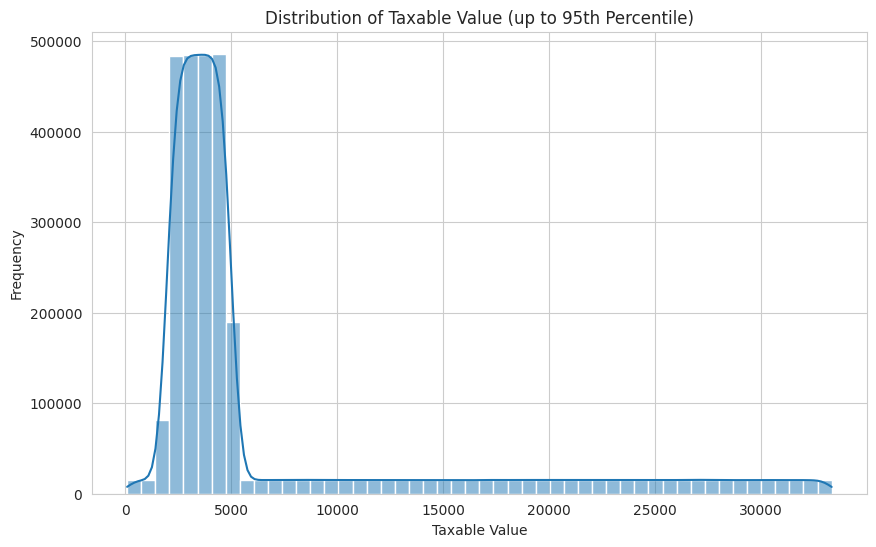

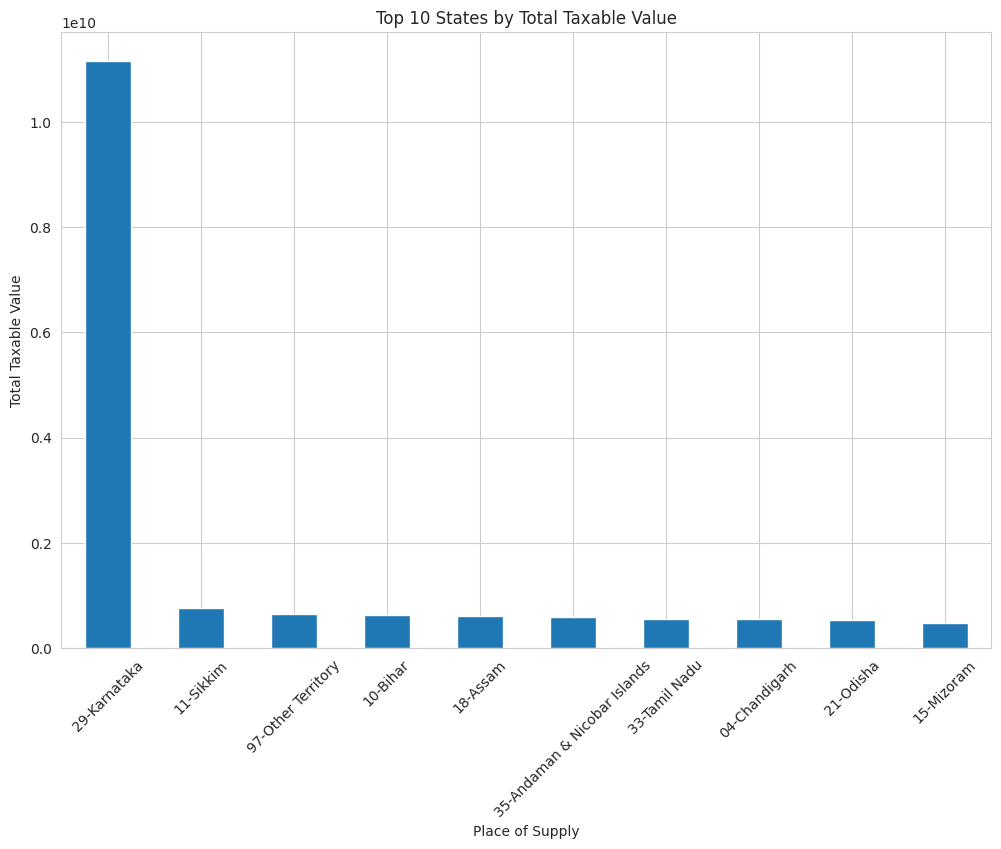

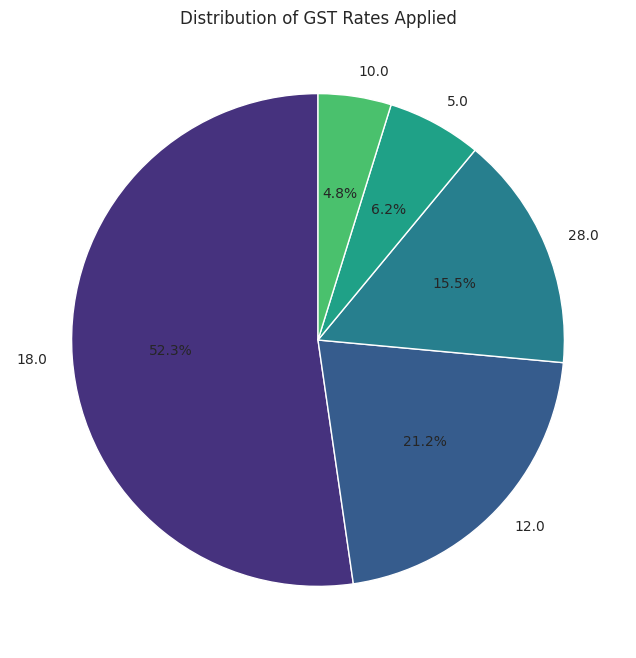

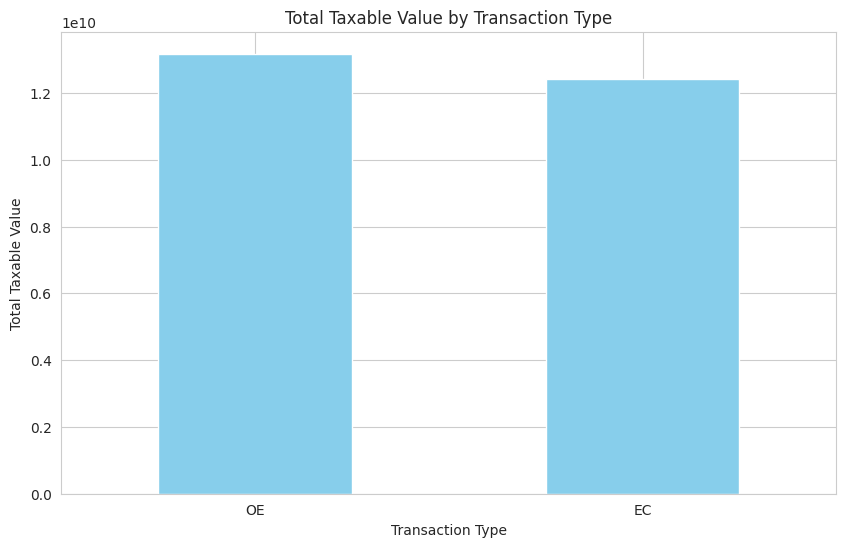

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Step 7: Data Visualization ---")
sns.set_style("whitegrid")

# 1. Distribution of Taxable Value (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['taxable_value'][df['taxable_value'] < df['taxable_value'].quantile(0.95)], bins=50, kde=True) # Plotting only 95% to avoid extreme outliers skewing the view
plt.title('Distribution of Taxable Value (up to 95th Percentile)')
plt.xlabel('Taxable Value')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Chart for Top 10 'Place of Supply' by Taxable Value
plt.figure(figsize=(12, 8))
total_value_by_place.head(10).plot(kind='bar')
plt.title('Top 10 States by Total Taxable Value')
plt.ylabel('Total Taxable Value')
plt.xlabel('Place of Supply')
plt.xticks(rotation=45)
plt.show()

# 3. Pie Chart for GST Rate Distribution
plt.figure(figsize=(8, 8))
df['rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of GST Rates Applied')
plt.ylabel('') # Hides the 'rate' label on the y-axis
plt.show()

# 4. Bar Chart for Taxable Value by Transaction Type
plt.figure(figsize=(10, 6))
total_value_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Taxable Value by Transaction Type')
plt.ylabel('Total Taxable Value')
plt.xlabel('Transaction Type')
plt.xticks(rotation=0)
plt.show()

Identify Patterns and Outliers

Goal: Find trends, clusters, or anomalies using visuals.


--- Step 8: Identifying Outliers ---


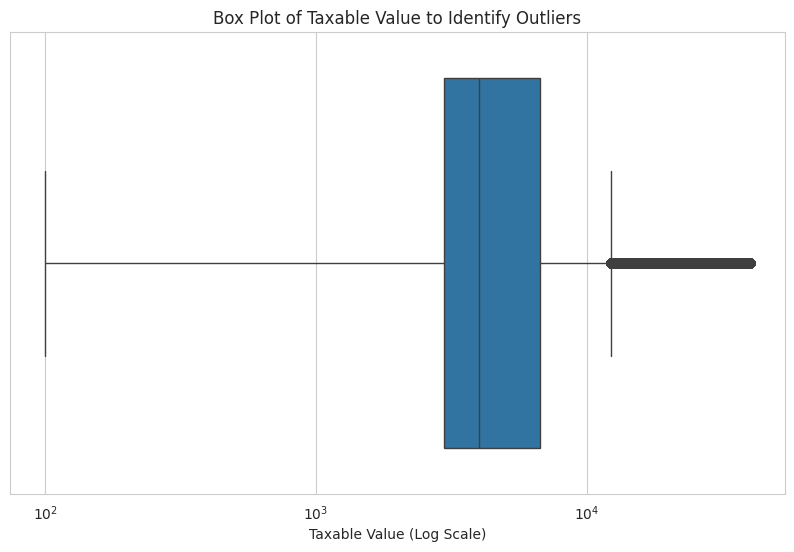


--- Step 9: Hypothesis Testing ---
T-test for mean taxable value between '29-Karnataka' and '11-Sikkim':
P-value: 0.5560867315076674
Result: There is no statistically significant difference in mean taxable value.


In [ ]:
print("\n--- Step 8: Identifying Outliers ---")

# Use a box plot to find outliers in Taxable Value
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['taxable_value'])
plt.title('Box Plot of Taxable Value to Identify Outliers')
plt.xscale('log') # Use a log scale if the data is highly skewed
plt.xlabel('Taxable Value (Log Scale)')
plt.show()
# **Interpretation:** The box plot will visually show data points that are statistically considered outliers (points far to the right). This could indicate very large transactions or data entry errors that might need verification.

### **Step 9: Hypothesis Testing**

# **Goal:** Statistically test an assumption. Let's test if the mean taxable value for the top two states is significantly different.

from scipy.stats import ttest_ind

print("\n--- Step 9: Hypothesis Testing ---")

# Hypothesis: The average taxable value in the top state is different from the second-best state.
# H0 (Null): The means are equal.
# H1 (Alternative): The means are different.

# Get the names of the top two states from our earlier analysis
top_state = total_value_by_place.index[0]
second_state = total_value_by_place.index[1]

# Get the taxable values for each of the two states
group1 = df[df['place_of_supply'] == top_state]['taxable_value']
group2 = df[df['place_of_supply'] == second_state]['taxable_value']

# Perform independent t-test (ignoring NaNs)
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')

print(f"T-test for mean taxable value between '{top_state}' and '{second_state}':")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: The difference in mean taxable value is statistically significant.")
else:
    print("Result: There is no statistically significant difference in mean taxable value.")

Data Summarization

Goal: Synthesize the key findings into clear, concise points.